In [1]:
# for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as plot_go
import cufflinks as cf
init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use
#for missing zipcodes
import geopy
#for heat maps
import folium
from folium.plugins import HeatMap

# Zillow Dataset

In [2]:
df_zillow=pd.read_excel('Zip_Zhvi_2bedroom.xlsx')

The dataset has 8946 rows and 262 columns. Surely, not every column is of our use

since we only want to keep our focus to New York, let's filter the rest of the districts

In [3]:
df_zillow=df_zillow[df_zillow['City']=='New York']

One of the most common problem that we usually encounter is of missing values, let's check if we have some missing values or not.

In [4]:
if (df_zillow.isna().sum().sum() == 0) == True:
  print("There are no missing data, we're lucky!")
else:
    miss_col=df_zillow.isnull().any().sum()
    print(f"This need further investigation {miss_col} of the coulmns have missing values")

This need further investigation 134 of the coulmns have missing values


out of all these columns we only need the first 7 and the last most column which represents the most latest price of these properties

In [5]:
#let's shrink our dataset
df_zillow_shrinked=df_zillow.iloc[:,:7]
df_zillow_shrinked[df_zillow.columns[-1]]=df_zillow.iloc[:,-1]

In [6]:
df_zillow_shrinked.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2017-06-01 00:00:00
0,61639,10025,New York,NY,New York,New York,1,1431000
2,61637,10023,New York,NY,New York,New York,3,2142300
13,61703,10128,New York,NY,New York,New York,14,1787100
14,61625,10011,New York,NY,New York,New York,15,2480400
20,61617,10003,New York,NY,New York,New York,21,2147000


lucky enough, the shriked dataset has no missing value

Let's explore the bit of the data before moving to the other dataset

In [7]:
df_zillow_shrinked['SizeRank'].head(5)

0      1
2      3
13    14
14    15
20    21
Name: SizeRank, dtype: int64

5 of the Regions are in top 25, indeed New York City is a good place to invest

Now is the good time to perform some exploratory data anlysis on the zillow data set and observe how the values of the properties have been appreciated in a period of 10 years. We are using the analysis for 10 years from the year 2007-06 to 2017-06 because lucky enough, these columns have none empty values. Let's explore the data

In [8]:
df_zlw_appr=df_zillow.iloc[:,-121:].transpose()
df_zlw_appr.columns=df_zillow.iloc[:,0]

In [9]:
df_zlw_appr.iloc[:,:10].iplot(title='Value of top 10 zipcodes appreciated over 10 years')

this tells a great story, indeed the values of the properties have been appreciated and NYC is a good place to invest.

# AirBnb Dataset

Now it's time to explore the AirBnb Dataset

In [10]:
df_airbnb=pd.read_csv('listings.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (43,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.



In [11]:
df_airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190708031610,2019-07-09,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
4,5022,https://www.airbnb.com/rooms/5022,20190708031610,2019-07-08,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10


It looks like a messy dataset with alot of features, we need to shrink our focus to only most relevant ones

In [12]:
cols_need = ['zipcode',
        "bedrooms",
        "neighbourhood_cleansed",
        "neighbourhood_group_cleansed",
        "latitude", 
        "longitude",
        "property_type", 
        "price", 
        'availability_365']

In [13]:
df_airbnb_shrinked=df_airbnb[cols_need]

Since we only need to analyse the 2 bedrooms, let's shrink our attention

In [14]:
df_airbnb_shrinked=df_airbnb_shrinked[df_airbnb_shrinked['bedrooms'] == 2.]

In [15]:
df_airbnb_shrinked

,zipcode,bedrooms,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,availability_365
19,10029,2.0,East Harlem,Manhattan,40.79685,-73.94872,Apartment,$190.00,249
48,11221,2.0,Bedford-Stuyvesant,Brooklyn,40.68554,-73.94090,Townhouse,$115.00,0
52,11206,2.0,Williamsburg,Brooklyn,40.70420,-73.93560,Loft,$228.00,140
61,10001,2.0,Chelsea,Manhattan,40.74623,-73.99530,Apartment,$375.00,180
62,10162,2.0,Upper East Side,Manhattan,40.77065,-73.95269,Apartment,$250.00,231
...,...,...,...,...,...,...,...,...,...
48804,10004,2.0,Financial District,Manhattan,40.70597,-74.01562,Apartment,$99.00,22
48806,11229,2.0,Sheepshead Bay,Brooklyn,40.59731,-73.93381,House,$140.00,171
48813,11691,2.0,Bayswater,Queens,40.61113,-73.76546,Apartment,$80.00,87
48860,10044,2.0,Roosevelt Island,Manhattan,40.76688,-73.94688,Condominium,$145.00,30


In [16]:
#let's check for the missing values
df_airbnb_shrinked.isnull().sum()

zipcode                         50
bedrooms                         0
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
property_type                    0
price                            0
availability_365                 0
dtype: int64

Dang! 50 Zipcodes are missing

let's try to find those missing zipcodes by the aid of geopy library to perform the process of reverse geocoding

In [17]:
from geopy import Nominatim
#give any arbitrary name
geolocator =Nominatim(user_agent='geolocator/1')

In [18]:
def zip_imputer(cols):
    lat=cols[0]
    long=cols[1]
    zipcode=cols[2]
    if pd.isnull(zipcode):
        cord=str(lat)+','+str(long)
        location=geolocator.reverse(cord)
        zip_=location.address.split(',')[-2].strip()
        return zip_
    else:
        return zipcode

In [19]:
df_airbnb_shrinked['zipcode']=df_airbnb_shrinked[['latitude','longitude','zipcode']].apply(zip_imputer,axis=1)

In [20]:
df_airbnb_shrinked.shape

(6497, 9)

In [21]:
df_airbnb_shrinked

,zipcode,bedrooms,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,availability_365
19,10029,2.0,East Harlem,Manhattan,40.79685,-73.94872,Apartment,$190.00,249
48,11221,2.0,Bedford-Stuyvesant,Brooklyn,40.68554,-73.94090,Townhouse,$115.00,0
52,11206,2.0,Williamsburg,Brooklyn,40.70420,-73.93560,Loft,$228.00,140
61,10001,2.0,Chelsea,Manhattan,40.74623,-73.99530,Apartment,$375.00,180
62,10162,2.0,Upper East Side,Manhattan,40.77065,-73.95269,Apartment,$250.00,231
...,...,...,...,...,...,...,...,...,...
48804,10004,2.0,Financial District,Manhattan,40.70597,-74.01562,Apartment,$99.00,22
48806,11229,2.0,Sheepshead Bay,Brooklyn,40.59731,-73.93381,House,$140.00,171
48813,11691,2.0,Bayswater,Queens,40.61113,-73.76546,Apartment,$80.00,87
48860,10044,2.0,Roosevelt Island,Manhattan,40.76688,-73.94688,Condominium,$145.00,30


Now it's time to combine the two dataset

In [22]:
#let's first make the names of the columns of the two datasets consistent
df_zillow_shrinked = df_zillow_shrinked.rename({'RegionName':'zipcode'}, axis=1)
df_zillow_shrinked['zipcode'] = df_zillow_shrinked['zipcode'].astype('str')
df_airbnb_shrinked['zipcode'] = df_airbnb_shrinked['zipcode'].astype('str')
df_zillow_shrinked.drop(['RegionID'],axis=1,inplace=True)

In [23]:
#let's rename the name of the final column to something that makes more sense
df_zillow_shrinked.columns=['zipcode','City','State','Metro','CountyName','SizeRank','Sell_price']

It is time to have a look at the shape of the datasets to ensure we don't miss anything important while merging

In [24]:
df_airbnb_shrinked.shape

(6497, 9)

In [25]:
df_zillow_shrinked.shape

(25, 7)

In [26]:
zlw_bnb = pd.merge(df_zillow_shrinked, df_airbnb_shrinked, how = 'inner', on = 'zipcode')
zlw_bnb.shape

(1105, 15)

In [27]:
zlw_bnb.isnull().sum()

zipcode                         0
City                            0
State                           0
Metro                           0
CountyName                      0
SizeRank                        0
Sell_price                      0
bedrooms                        0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
price                           0
availability_365                0
dtype: int64

Before we move on to the exploratory data analysis of the merged dataset, let's we first make the format of the price column correct in the dataframe. The price column has values with dollar sign, which can confuse the plotting process. We first need to remove the $ sign and then clean the data from all of the comma separated values

In [28]:
def cleaner(df):    
    #to remove $ sign
    df['price']=df['price'].apply(lambda x: x.split('$')[1])
    #to remove comma separated values
    df['price']=df['price'].astype(str).apply(lambda x : float(x.replace(',','')))
    #to make the price as float
    df['price']=df['price'].astype('float')
    return df['price']

In [29]:
#let's apply the transformation
zlw_bnb['price']=cleaner(zlw_bnb)

In [30]:
zlw_bnb.head()

,zipcode,City,State,Metro,CountyName,SizeRank,Sell_price,bedrooms,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,availability_365
0,10025,New York,NY,New York,New York,1,1431000,2.0,Upper West Side,Manhattan,40.79264,-73.97294,Apartment,95.0,0
1,10025,New York,NY,New York,New York,1,1431000,2.0,Upper West Side,Manhattan,40.79765,-73.96245,Apartment,165.0,236
2,10025,New York,NY,New York,New York,1,1431000,2.0,Upper West Side,Manhattan,40.80006,-73.96049,Apartment,250.0,259
3,10025,New York,NY,New York,New York,1,1431000,2.0,Upper West Side,Manhattan,40.77350,-73.98697,Condominium,2000.0,0
4,10025,New York,NY,New York,New York,1,1431000,2.0,Upper West Side,Manhattan,40.79816,-73.96190,Apartment,300.0,31


Since the data is in good shape now, let's explore how the dataset is distributed and how many outliers each region have.

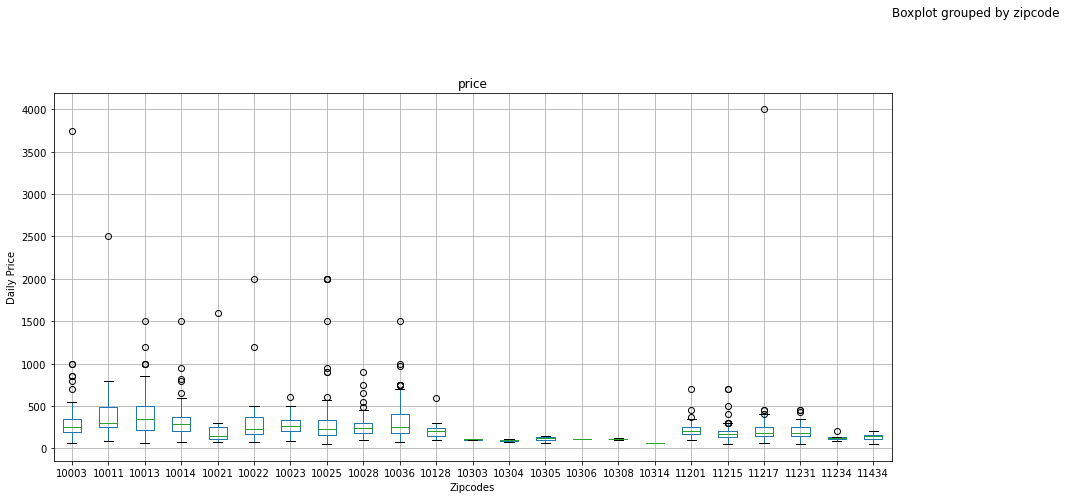

In [31]:
fig = plt.figure(figsize=(32,15))
ax_1 = fig.add_subplot(221);
zlw_bnb.boxplot(column='price', by='zipcode',ax=ax_1)
ax_1.set_xlabel("Zipcodes");
ax_1.set_ylabel("Daily Price");

There indeed are outliers. It makes perfect sense as in real world scenario not all houses worth same. Some are more developed than the others.

let's discover how regions are spread among different neighborhood

In [32]:
zlw_bnb.neighbourhood_group_cleansed.unique()

array(['Manhattan', 'Brooklyn', 'Staten Island', 'Queens'], dtype=object)

In [33]:
zlw_bnb.groupby("neighbourhood_group_cleansed").agg({'zipcode':'nunique'}).iplot(kind='barh',title='Frequency of Zipcodes in Boroughs')

Turned out, Manhattan is the borough with the most number of regions 

Previoulsy, we have analyzed the distribution of the properties based on zipcodes. This time, let's explore the distribution based on the boroughs. 

In [34]:
nghbr_price = zlw_bnb[['neighbourhood_group_cleansed','zipcode','price']]

tab = []

for tag, mark in nghbr_price.groupby('neighbourhood_group_cleansed'):
    tab.append(plot_go.Box(y = mark.price, name = tag))

box_fig = plot_go.Layout(height = 600, width = 750, xaxis = dict(title='Borough'), yaxis = dict(title='Nightly Price'),
                   title = 'Borough Price per Night')
box_chart = plot_go.Figure(data = tab, layout = box_fig)
iplot(box_chart)

This is fascinating. We all know how Manhatten is a expensive borough to liveby. There are many outliers in the Manhatten which again substantiate the previous finding of most number of zipcodes in Manhatten. The minimun price per night in the Brooklyn, Manhatten and Queens can be as low as 50 dollars while at Staten Island it is 60. But that doesnot mean Staten Islan is an Expensive place. Although, the median price per night for Staten Island is cheapest of all the other boroughs.

Now let's head towards finding more meaningful and quantifiable metric

# Metrics

For now we have done enough of the visual analyses. Now it is time to dive deep and explore some metrics

The first metric we are going to use is **Rate**. The reason to use this metric is to emphasis on the fact that all the real world assets either appreciates or depriciates with time. This is due to the fact that the money has time value. The value of assets change with time. The rate metric holds some water because it embraces the time value of money. In our data, the rate metric will tell us the average rate by which the value of the properties in an particular region has been appreciated or depriciated.

\begin{equation*}
Rate =\frac{Most latest Property Value -  Property Value in Past}{Property Value in Past * Difference of Years}
\end{equation*}

Since we want to keep the analysis scalabale. Let's build a function that first check the columns with the zero missing values and then calculate rate out of it

In [35]:
def rate(df,n):
    null_check = df.isnull().sum() # to check the presence of null value in any particular year
    null_filter = null_check[null_check == 0] # this will filter out all the columns with missing values

    df_ = df[null_filter.index]
    y=df_.iloc[:,df_.shape[1]-1]
    x=df_.iloc[:,df_.columns.get_loc("SizeRank")+1]
    rate=(y-x)/(x*n)
    return(rate)

In [36]:
df_zillow_shrinked['rate']=rate(df_zillow,10)

In [37]:
df_zillow_shrinked.head()

,zipcode,City,State,Metro,CountyName,SizeRank,Sell_price,rate
0,10025,New York,NY,New York,New York,1,1431000,0.061988
2,10023,New York,NY,New York,New York,3,2142300,0.051807
13,10128,New York,NY,New York,New York,14,1787100,0.075120
14,10011,New York,NY,New York,New York,15,2480400,0.063766
20,10003,New York,NY,New York,New York,21,2147000,0.056979


In [38]:
#let's update the dataset
zlw_bnb = pd.merge(df_zillow_shrinked, df_airbnb_shrinked, how = 'inner', on = 'zipcode')

In [39]:
#let's apply the transformation
zlw_bnb['price']=cleaner(zlw_bnb)

Awesome! now let's head towards the next metric

**Return on Investment**: This is metric by which we can quantify the amount that we are going to get back after the initial investment has been made. It is an important metric because it makes the certain investments attractive and help us identify to get the best deal out of the pool of deals. In this dataset, we will calculate the ROI for the next 10 years based on the assumption that the rate by which rent appreciates is constant without including the equity value of the property.



\begin{equation*}
ROI with equity =\frac{Latest Price of Property*(1+\frac{Rate}{100})^{diff of years}- Current Price of the property}{Current Price of the property}
\end{equation*}

Without equity taken into account

A=Annual Rent in 10 years

\begin{equation*}
Annual Rent*10
\end{equation*}




B= Increase in cost of property in 10 Years



\begin{equation*}
Price of Property*(1+\frac{Rate}{100})^{10}- Current Price of the property
\end{equation*}



Roi= (A+B)/Price of Property

\begin{equation*}
\frac{(A+B)}{Price Of Property}
\end{equation*}

To calculate the ROI, we first need to calculate the annual revenue generated by the property.
to simplify our analysis, we have assumed the annual occupancy rate to be equal to 75%. This is going to be remain constant for all of the properties. One more thing, we are also going to take into account the 

In [40]:
occ_rate=0.75
zlw_bnb['Annual_Revenue']=zlw_bnb['price'] * occ_rate * 365

In [41]:
zlw_bnb.head()

,zipcode,City,State,Metro,CountyName,SizeRank,Sell_price,rate,bedrooms,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,availability_365,Annual_Revenue
0,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79264,-73.97294,Apartment,95.0,0,26006.25
1,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79765,-73.96245,Apartment,165.0,236,45168.75
2,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.80006,-73.96049,Apartment,250.0,259,68437.50
3,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.77350,-73.98697,Condominium,2000.0,0,547500.00
4,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79816,-73.96190,Apartment,300.0,31,82125.00


In [42]:
def roi_with_equity(df,n):
    return(((((1+df["rate"]))**n)*df["Sell_price"]-df["Sell_price"])/df["Sell_price"])

def roi(df,n):
    A=df['Annual_Revenue']*n
    B=((((1+df["rate"]))**n)*df["Sell_price"]-df["Sell_price"])
    return (A+B)/df['Sell_price']

In [43]:
zlw_bnb["roi"]=roi(zlw_bnb,10)
zlw_bnb["roi_with_equity"]=roi_with_equity(zlw_bnb,10)

In [44]:
zlw_bnb

,zipcode,City,State,Metro,CountyName,SizeRank,Sell_price,rate,bedrooms,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,availability_365,Annual_Revenue,roi,roi_with_equity
0,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79264,-73.97294,Apartment,95.0,0,26006.25,1.006450,0.824716
1,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79765,-73.96245,Apartment,165.0,236,45168.75,1.140360,0.824716
2,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.80006,-73.96049,Apartment,250.0,259,68437.50,1.302965,0.824716
3,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.77350,-73.98697,Condominium,2000.0,0,547500.00,4.650711,0.824716
4,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79816,-73.96190,Apartment,300.0,31,82125.00,1.398615,0.824716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,10305,New York,NY,New York,Richmond,2087,425100,0.022190,2.0,Dongan Hills,Staten Island,40.57825,-74.08879,Apartment,95.0,134,26006.25,0.857193,0.245425
1101,10308,New York,NY,New York,Richmond,4149,409500,0.016833,2.0,Great Kills,Staten Island,40.54550,-74.14829,House,99.0,325,27101.25,0.843485,0.181671
1102,10308,New York,NY,New York,Richmond,4149,409500,0.016833,2.0,Great Kills,Staten Island,40.54901,-74.14200,House,120.0,86,32850.00,0.983869,0.181671
1103,10303,New York,NY,New York,Richmond,4647,327700,0.010486,2.0,Howland Hook,Staten Island,40.63245,-74.17065,House,100.0,88,27375.00,0.945311,0.109943


In [45]:
zlw_bnb.pivot_table(values='roi_with_equity',index='neighbourhood_group_cleansed').iplot(kind='barh',title="Avg ROI's with equity for boroughs")

In [46]:
zlw_bnb.pivot_table(values='roi',index='neighbourhood_group_cleansed').iplot(kind='barh',title="Avg ROI's for boroughs")

**Payback Period**: Another good metric is payback period. It is simply the speed at which the investments is returned based on the cash flows it generates. For an investment to be attractive the payback period should be as small as possible. It is simply the ratio of the initial investment to the annual revenure that a property generates.
\begin{equation*}
Payback Period =\frac{Initial Investment}{Annual Revenue}
\end{equation*}

In [47]:
#let's calculate payback period
zlw_bnb['Payback']=zlw_bnb['Sell_price']/zlw_bnb['Annual_Revenue']

Great! Now let's move ahead and check average payback period for all boroughs

In [48]:
zlw_bnb.pivot_table(values='Payback',index='neighbourhood_group_cleansed').iplot(kind='barh',title='Avg Payback period in years')

Manhatten has the largest payback period. The other three boroughs have less than that of Manhatten

In [49]:
zlw_bnb

,zipcode,City,State,Metro,CountyName,SizeRank,Sell_price,rate,bedrooms,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,availability_365,Annual_Revenue,roi,roi_with_equity,Payback
0,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79264,-73.97294,Apartment,95.0,0,26006.25,1.006450,0.824716,55.025234
1,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79765,-73.96245,Apartment,165.0,236,45168.75,1.140360,0.824716,31.681196
2,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.80006,-73.96049,Apartment,250.0,259,68437.50,1.302965,0.824716,20.909589
3,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.77350,-73.98697,Condominium,2000.0,0,547500.00,4.650711,0.824716,2.613699
4,10025,New York,NY,New York,New York,1,1431000,0.061988,2.0,Upper West Side,Manhattan,40.79816,-73.96190,Apartment,300.0,31,82125.00,1.398615,0.824716,17.424658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,10305,New York,NY,New York,Richmond,2087,425100,0.022190,2.0,Dongan Hills,Staten Island,40.57825,-74.08879,Apartment,95.0,134,26006.25,0.857193,0.245425,16.346071
1101,10308,New York,NY,New York,Richmond,4149,409500,0.016833,2.0,Great Kills,Staten Island,40.54550,-74.14829,House,99.0,325,27101.25,0.843485,0.181671,15.110004
1102,10308,New York,NY,New York,Richmond,4149,409500,0.016833,2.0,Great Kills,Staten Island,40.54901,-74.14200,House,120.0,86,32850.00,0.983869,0.181671,12.465753
1103,10303,New York,NY,New York,Richmond,4647,327700,0.010486,2.0,Howland Hook,Staten Island,40.63245,-74.17065,House,100.0,88,27375.00,0.945311,0.109943,11.970776


Before ending our analysis, let's explore the data on the map for the one last time

In [50]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent = 'geolocator/1')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of properties using latitude and longitude values
map_zillow_bnb = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(zlw_bnb['latitude'], 
                                           zlw_bnb['longitude'],  
                                           zlw_bnb['neighbourhood_group_cleansed']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zillow_bnb)  
    
map_zillow_bnb

In [51]:

map_heat = folium.Map(location=[latitude, longitude], zoom_start=10)

zlw_bnb['latitude'] = zlw_bnb['latitude'].astype(float)
zlw_bnb['longitude'] = zlw_bnb['longitude'].astype(float)

heat_data = [[row['latitude'],row['longitude']] for index, row in zlw_bnb.iterrows()]


HeatMap(heat_data).add_to(map_heat)

map_heat

Everything seems good and nice!

# Conclusion

In [52]:
zlw_bnb[['zipcode','roi','Payback','neighbourhood_group_cleansed']].groupby('zipcode').agg({'roi':'mean',
    'Payback':'mean',                                                                                       
    'neighbourhood_group_cleansed':'first'}).sort_values('Payback').head(6)

,roi,Payback,neighbourhood_group_cleansed
zipcode,,,
10303,1.007964,11.190073,Staten Island
10306,0.894117,12.277452,Staten Island
10304,0.864188,13.172199,Staten Island
11434,0.928471,13.741494,Queens
10308,0.913677,13.787879,Staten Island
11234,0.911339,14.526147,Brooklyn


Based on the above data we can safely infer that the top 5 zip codes to be invested are:

Staten Island (10303,10306,10304), Queens (11434) and Brooklyn (11234).

- Based on our analysis, Manhatten is not a good place to invest for short term investment. The returns and payback period are quite high which make the place less attractive for short term. if the investor could wait, Manhatten can be far more profitable in a long run
- Additionally, more features about these zipcodes can tell the complete story if these are really the nice place to invest


# Future Recommendation

- This analysis was entirely based for the 2 bedrooms places. To simplify our analysis we indeed ignored some of the important considerations. Also, these other factor like proximity to downtown, airports and tourist places could affect the customer behaviour.
- We only included the effect of 75% occupancy. This however may not be indicative of the true occupancy rate. Some places might get lesses visitors
- We did not include a single factor to analyze why customers prefer certain locations over the other.
- The latest price of the properties was from the year 2017-06 which is almost 4 years old. Now the situation of the market is completely different.
- The payback was not discounted by the time value of the money. In reality, the payback may vary. The interest rate is an important factor to take into account to estimate the correct returns.